<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r1-less-features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-1-r1.csv?token=AKVFSOETZRFQBGVQK66MAC263H7KC')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-11-r1.csv?token=AKVFSOH2WAU53NLLXJKHJZK63H7KM')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-4-m-1-r1.csv?token=AKVFSOFCLPOFDKMZ7XXD6K263H7KS')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-4-m-11-r1.csv?token=AKVFSODXEKMPFAIOQMR3EZC63H7KY')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-6-m-1-r1.csv?token=AKVFSOHXF4IN2NBH4U7GNIK63H7K4')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-6-m-11-r1.csv?token=AKVFSOHEORJG6KWBGDNXELK63H7LA')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-9-m-1-r1.csv?token=AKVFSOEOUFCXGS4V7HUBC2S63H7LG')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-9-m-11-r1.csv?token=AKVFSOGCCDUUZPIUPV2AX6263H7LO')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-normal-n-0-15-r1.csv?token=AKVFSOA3XVJD43T2VKTXW2C63H7LS')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-normal-n-0-4-r1.csv?token=AKVFSOHDYRUG4HAZVEO5UJS63H7LW')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-normal-n-0-6-r1.csv?token=AKVFSOD6LWRBT65MLTU4C7K63H7MA')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-normal-n-0-9-r1.csv?token=AKVFSOGJVO2EQY7E3MMPNGS63H7MG')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(116064, 26)
(57667, 26)
(116768, 26)
(58499, 26)
(116217, 26)
(57941, 26)
(117167, 26)
(58789, 26)
(45531, 26)
(46322, 26)
(45790, 26)
(46621, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,78,1,78,78,0,8,3,27,0
1,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,84,1,84,84,0,8,3,27,0
2,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,84,1,84,84,0,8,3,27,0
3,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,84,1,84,84,0,8,3,27,0
4,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,83,2,84,166,8,4,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883371,3276525,4,2,6,2,2,3,9,18,2,20,4,30091,3,1,0.333333,15,5,16,20,80,8,722184,18,162,0
883372,3276532,4,2,6,3,2,3,9,18,2,20,4,30091,3,1,0.333333,22,4,17,20,68,8,1083276,18,162,0
883373,3276539,4,2,6,4,2,3,9,18,2,20,4,30091,3,1,0.333333,29,3,18,20,54,8,1444368,18,162,0
883374,3276546,4,2,6,5,3,3,9,18,2,20,4,30091,3,1,0.333333,36,2,19,20,38,8,2708190,18,162,0


In [0]:
df.shape

(883376, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-12-r1.csv?token=AKVFSOC5UXUUHGMH6WRX2DS63IADW')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-15-m-7-r1.csv?token=AKVFSOCEMAZYITSUEMAWNZC63IAD4')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-4-m-12-r1.csv?token=AKVFSODO577K2RAF5MPNFRK63IAEC')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-4-m-7-r1.csv?token=AKVFSOD5M6HXXJAJDK7OMSC63IAEI')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-6-m-12-r1.csv?token=AKVFSOBCV6BTIWSZ25YS2ES63IAEM')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-6-m-7-r1.csv?token=AKVFSOC3CQJKARLKYOPO62C63IAES')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-9-m-12-r1.csv?token=AKVFSOGTM4ZFZCZVRAE63YS63IAEW')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r1/2-fft-malicious-n-0-9-m-7-r1.csv?token=AKVFSOBTWFVLTZAFEMZNUSK63IAE2')

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(58499, 26)
(57667, 26)
(58807, 26)
(58499, 26)
(58225, 26)
(57937, 26)
(59104, 26)
(58796, 26)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,1,1,23,7,2,3,0,0.000000,4,84,1,84,84,0,8,3,27,0
1,11,2,4,1,1,4,3,9,0,0,23,7,1,4,1,0.250000,8,83,2,84,166,8,4,3,27,0
2,84,0,1,4,1,1,5,17,23,7,1,1,2,3,3,1.000000,16,82,3,84,246,0,8,20,340,0
3,86,0,1,4,2,2,5,17,23,7,1,1,2,3,3,1.000000,18,81,4,84,324,0,32,20,340,0
4,87,0,1,4,3,2,5,17,23,7,1,1,2,3,3,1.000000,19,80,5,84,400,0,48,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116212,3266084,2,4,5,2,2,3,9,0,0,22,6,30087,3,1,0.333333,15,5,2,6,10,8,601740,15,135,0
116213,3266091,2,4,5,3,2,3,9,0,0,22,6,30087,3,1,0.333333,22,4,3,6,12,8,902610,15,135,0
116214,3266098,2,4,5,4,2,3,9,0,0,22,6,30087,3,1,0.333333,29,3,4,6,12,8,1203480,15,135,0
116215,3266105,2,4,5,5,3,3,9,0,0,22,6,30087,3,1,0.333333,36,2,5,6,10,8,2256525,15,135,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.135665,0.265831,-0.002416,0.003635,-0.480654,-0.392392,-0.047719,0.142882,-0.457626,-0.640181,0.047531,-0.103951,-0.039386,-0.105906,-0.081629,0.438208,0.055873,-0.000276,-0.259684,0.095112
inport,-0.135665,1.000000,-0.090885,0.018735,-0.028189,-0.212810,-0.355972,-0.018517,0.342056,0.086621,0.133709,0.158912,-0.134336,-0.160163,-0.217593,-0.175076,0.706761,-0.020441,-0.196912,-0.318746,0.233250
cache_coherence_type,0.265831,-0.090885,1.000000,0.303271,-0.456288,-0.165371,-0.212228,-0.004014,-0.015452,-0.065334,-0.109046,-0.399541,-0.009539,-0.035921,-0.033588,-0.026280,0.077713,0.286037,0.857083,0.408596,0.024196
flit_id,-0.002416,0.018735,0.303271,1.000000,-0.034718,0.106726,0.042418,0.017414,0.032195,0.015031,-0.004405,0.491698,0.000547,0.020031,0.015204,0.014830,0.011289,0.668594,0.341877,0.246587,-0.012735
flit_type,0.003635,-0.028189,-0.456288,-0.034718,1.000000,-0.160575,-0.063821,-0.026200,-0.048439,-0.022615,0.006627,0.522981,-0.068069,0.037615,-0.022501,-0.019273,-0.016985,0.103157,-0.514373,-0.371004,0.019160
vnet,-0.480654,-0.212810,-0.165371,0.106726,-0.160575,1.000000,0.944023,0.055223,-0.028937,0.550368,0.567239,-0.128000,0.131362,0.155871,0.212225,0.171317,-0.348059,-0.004708,0.366349,0.817903,-0.189592
vc,-0.392392,-0.355972,-0.212228,0.042418,-0.063821,0.944023,1.000000,0.051240,-0.108035,0.414490,0.431008,-0.128596,0.139122,0.177796,0.234158,0.189263,-0.448028,-0.035227,0.292900,0.791799,-0.208955
traversal_id,-0.047719,-0.018517,-0.004014,0.017414,-0.026200,0.055223,0.051240,1.000000,0.052288,0.006201,-0.018077,-0.001799,0.154372,0.155291,0.228798,0.177765,-0.032479,0.543893,0.025059,0.045304,-0.241785
hop_count,0.142882,0.342056,-0.015452,0.032195,-0.048439,-0.028937,-0.108035,0.052288,1.000000,0.322848,-0.067877,0.185392,-0.088210,-0.050859,-0.102752,-0.085172,0.519453,0.035030,-0.029695,-0.077543,0.055042
current_hop,-0.457626,0.086621,-0.065334,0.015031,-0.022615,0.550368,0.414490,0.006201,0.322848,1.000000,0.832130,0.161507,0.021405,0.013971,0.026138,0.016089,0.006991,-0.024124,0.225856,0.414056,-0.054967


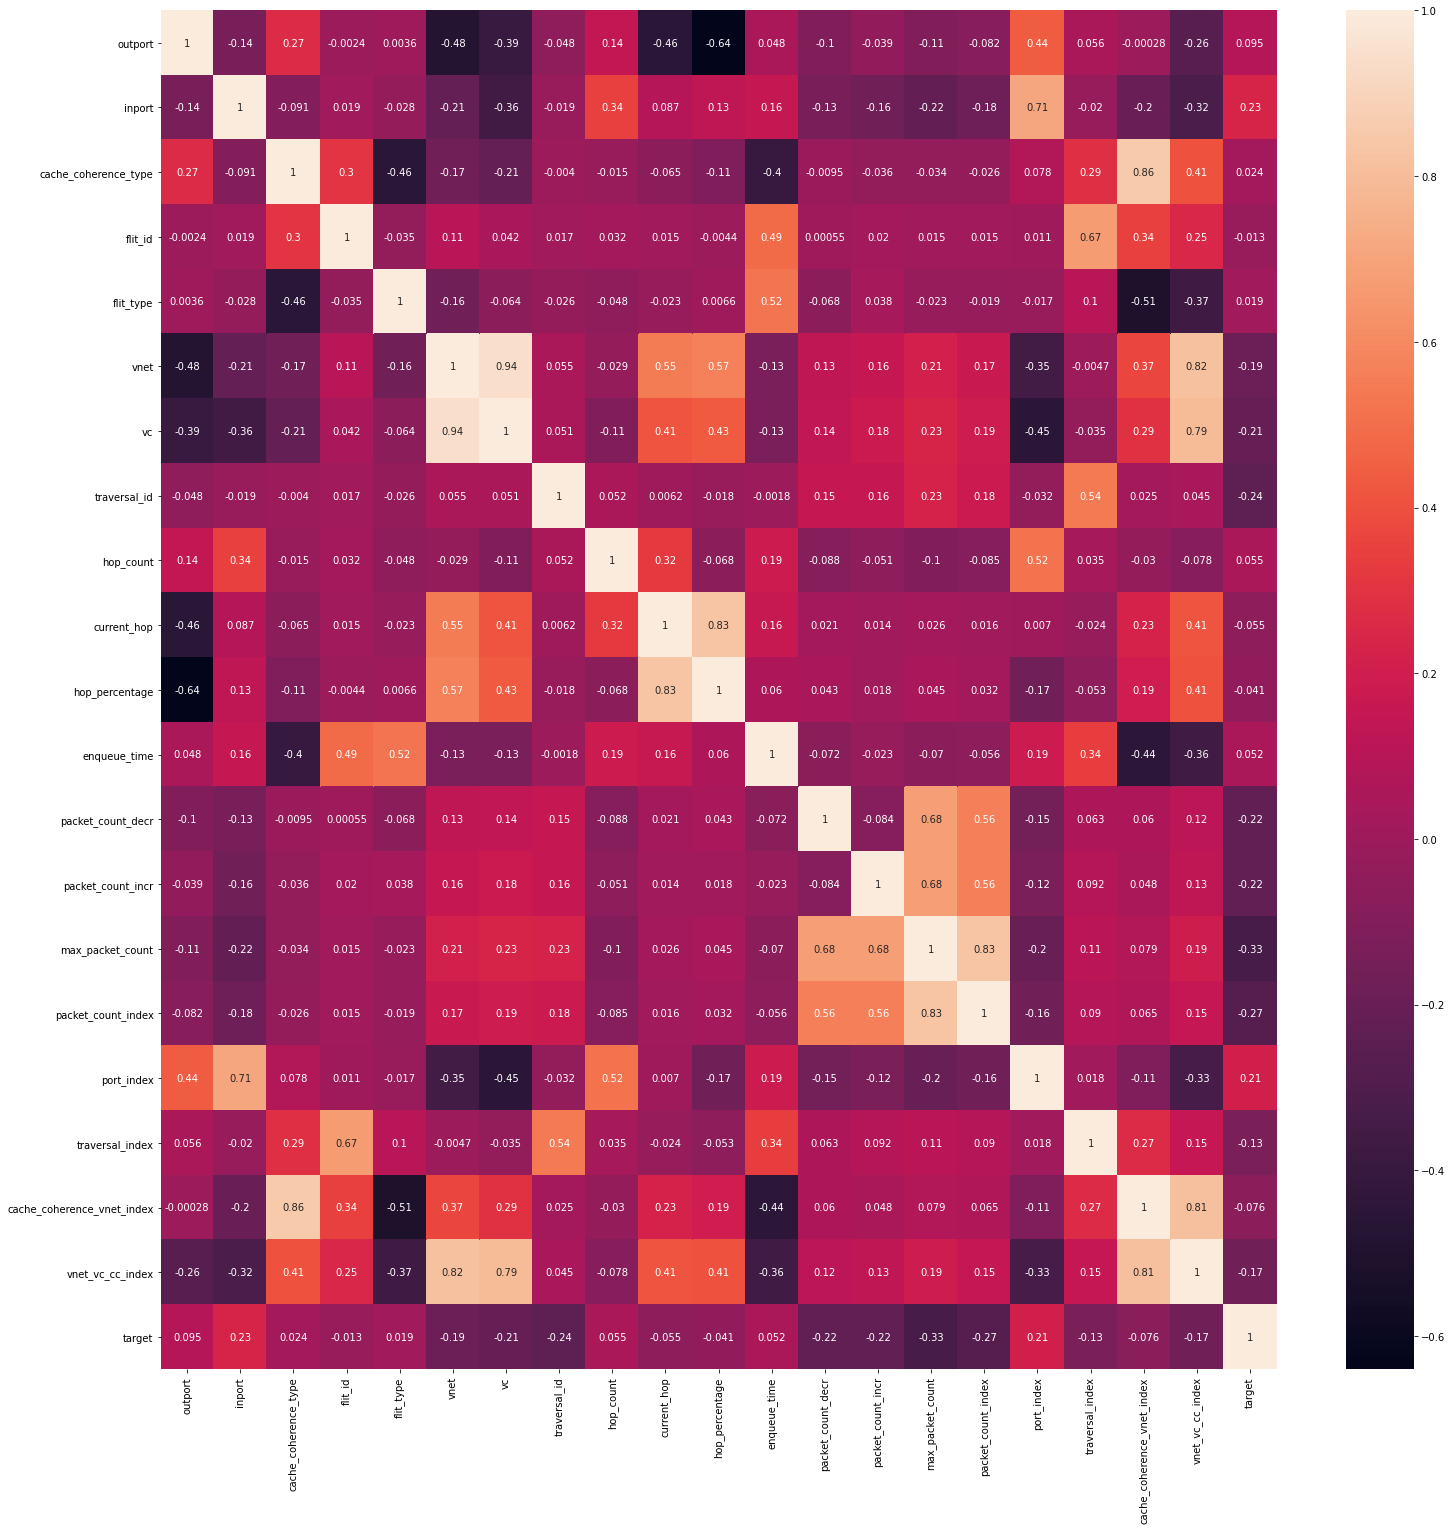

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

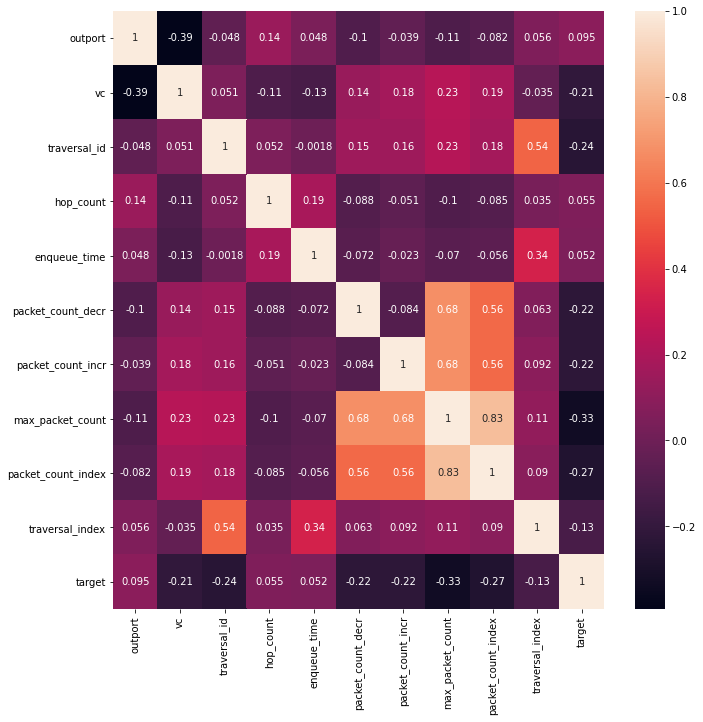

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

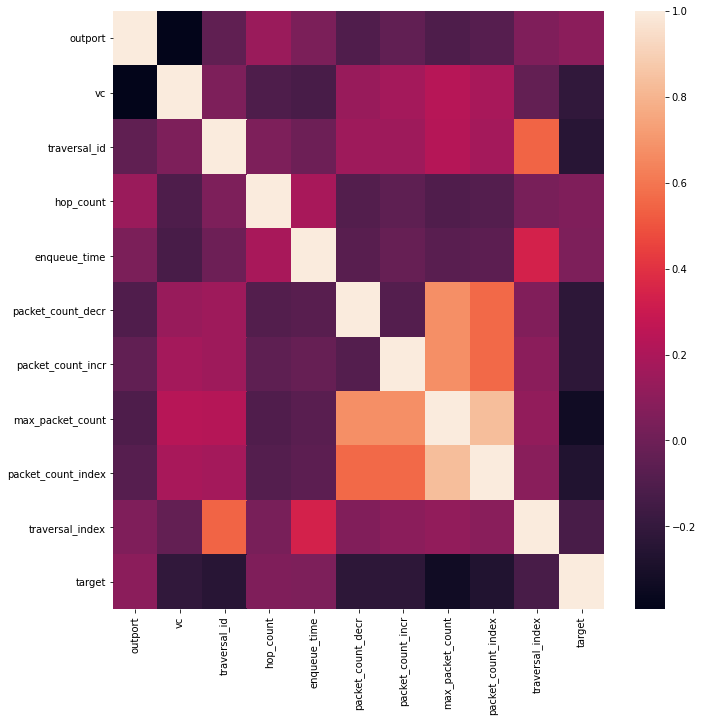

In [0]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000,0.000033,0.500000,0.000000,0.418478,0.000000,0.418478,0.008904,0.000001
1,0.5,0.000,0.000033,0.500000,0.000000,0.451087,0.000000,0.451087,0.009598,0.000001
2,0.5,0.000,0.000033,0.500000,0.000000,0.451087,0.000000,0.451087,0.009598,0.000001
3,0.5,0.000,0.000033,0.500000,0.000000,0.451087,0.000000,0.451087,0.009598,0.000001
4,0.5,0.000,0.000000,0.666667,0.062500,0.445652,0.005435,0.451087,0.019080,0.000000
...,...,...,...,...,...,...,...,...,...,...
883371,1.0,0.000,0.999900,0.500000,0.171875,0.021739,0.081522,0.103261,0.009135,0.266666
883372,1.0,0.000,0.999900,0.500000,0.281250,0.016304,0.086957,0.103261,0.007747,0.399999
883373,1.0,0.000,0.999900,0.500000,0.390625,0.010870,0.092391,0.103261,0.006129,0.533333
883374,1.0,0.000,0.999900,0.500000,0.500000,0.005435,0.097826,0.103261,0.004278,1.000000


In [0]:
train_X[train_X.duplicated()].shape

(6949, 10)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.50,0.000000,0.000000,0.6,0.062500,0.210526,0.000000,0.210526,0.007136,0.000000
1,0.50,0.000000,0.000233,0.4,0.062500,0.201754,0.008772,0.210526,0.013976,0.000010
2,0.50,0.000000,0.000333,0.6,0.062500,0.192982,0.017544,0.210526,0.020220,0.000015
3,0.25,0.000000,0.000432,0.2,0.062500,0.184211,0.026316,0.210526,0.025870,0.000019
4,0.00,0.000000,0.000499,0.8,0.312500,0.175439,0.035088,0.210526,0.030925,0.000022
...,...,...,...,...,...,...,...,...,...,...
58494,1.00,0.000000,0.999967,0.4,0.171875,0.035088,0.131579,0.166667,0.023491,0.266666
58495,1.00,0.000000,0.999967,0.4,0.281250,0.026316,0.140351,0.166667,0.019923,0.399999
58496,1.00,0.000000,0.999967,0.4,0.390625,0.017544,0.149123,0.166667,0.015760,0.533333
58497,1.00,0.000000,0.999967,0.4,0.500000,0.008772,0.157895,0.166667,0.011002,1.000000


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 10)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 10)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    699112
1    184264
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                Specs         Score
1                  vc  17335.515459
7    max_packet_count   9637.432452
8  packet_count_index   7732.321580
2        traversal_id   6902.223698
6   packet_count_incr   4823.191367
5   packet_count_decr   4814.244403
9     traversal_index   2072.678235
0             outport   1988.032170
4        enqueue_time    191.265248
3           hop_count    185.283027


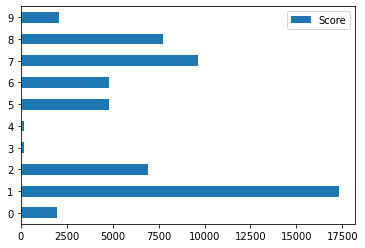

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.24395075703977
Test Prediction Score 94.50236591274424


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 89.79811620711466
Test Prediction Score 89.07520765775921
Test Prediction Score 89.96377982213002
Test Prediction Score 90.22889280158634
Test Prediction Score 89.51824817518248
Test Prediction Score 90.1927956228317
Test Prediction Score 89.60307255008121
Test Prediction Score 90.28675420096606


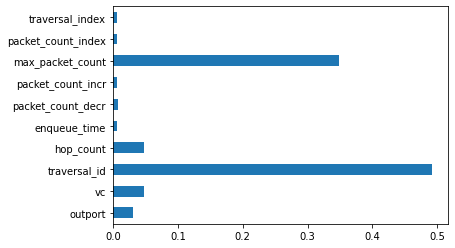

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

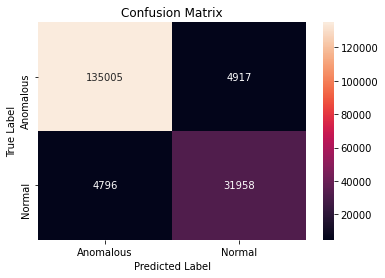

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97    139922
           1       0.87      0.87      0.87     36754

    accuracy                           0.95    176676
   macro avg       0.92      0.92      0.92    176676
weighted avg       0.95      0.95      0.95    176676



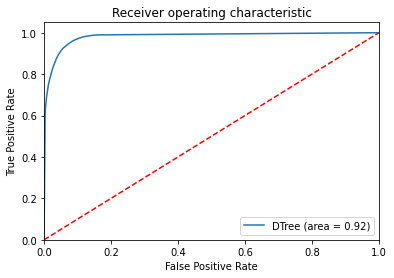

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [47]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r1l.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [50]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.97919909438234
Test Prediction Score 99.60436052434966


In [51]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 91.84088616899434
Test Prediction Score 92.07519031681898
Test Prediction Score 92.95151937694493
Test Prediction Score 93.25287611754047
Test Prediction Score 92.44654358093602
Test Prediction Score 92.93025182525847
Test Prediction Score 91.94132376827288
Test Prediction Score 92.96380706170487


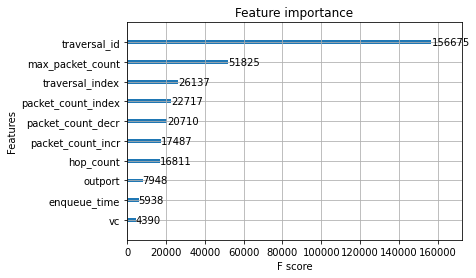

In [52]:
plot_importance(xgbc)
plt.show()

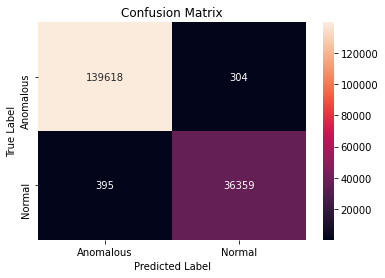

In [53]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139922
           1       0.99      0.99      0.99     36754

    accuracy                           1.00    176676
   macro avg       0.99      0.99      0.99    176676
weighted avg       1.00      1.00      1.00    176676



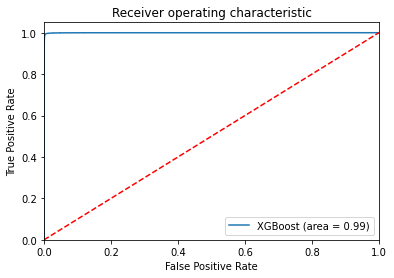

In [55]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()